In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import yaml
from pandas_datareader.data import DataReader
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
all_stocks = first_table['Symbol'].values.tolist()

In [3]:
dates = ['2018-10-01', '2020-01-01']
index_df = DataReader(['^GSPC'], 'yahoo', dates[0], dates[1])

In [5]:
def calc_stocks(stocks, dates):
    panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
    panel_data = panel_data.resample('BM').last()
    df = pd.DataFrame(index=panel_data.index, columns=stocks)
    for i in stocks:
        df[i] = panel_data[[('Adj Close', i)]]
    return df

def get_daily_data(stocks, dates):
    panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
    df = pd.DataFrame(index=panel_data.index, columns=stocks)
    for i in stocks:
        df[i] = panel_data[[('Adj Close', i)]]
    return df

def get_full_data(stocks, dates):
    panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
    panel_data = panel_data.resample('BM').last()
    return panel_data

### Daily data

In [ ]:
dates = ['2019-01-01', '2019-02-01']
stocks = all_stocks
df = get_daily_data(stocks, dates)
#df.dropna(inplace=True)
df

In [11]:
df.dropna(inplace=True, axis=1)
df.isnull().values.any()

False

In [14]:
print(df.columns.values.tolist())

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', '

In [13]:
df.iloc[:12,:].to_csv('20190102-20190117.csv')

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.dropna(inplace=True)
df_pct = df.pct_change().iloc[1:].mean(axis=0)
list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
print(list_50)
list_100 = df_pct.sort_values(ascending=False).iloc[:104].index.values.tolist()
print(list_100)
list_all = df.index.values.tolist()
print(len(list_all))
print(list_all)

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df2 = df.dropna(axis=1)
df2 = df2[sorted(df.columns)]#.reset_index()
df2 = df2.set_index('Date').reset_index()
list_full = df2.columns.values.tolist()
#list_full = df2.index.values.tolist()
#print(len(list_full))
print(list_full)
df2.to_csv('../sp500.csv')

### Pool rebalancing

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
#df.dropna(inplace=True)
#df_pct = df.pct_change().iloc[1:].mean(axis=0)
# list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
# print(list_50)
# list_100 = df_pct.sort_values(ascending=False).iloc[:104].index.values.tolist()
# print(list_100)
# list_all = df.index.values.tolist()
# print(len(list_all))
# print(list_all)

In [ ]:
print(df.shape)
df2 = df.dropna(axis=1)
print(df2.shape)
display(df2.head())
df_pct = df2.pct_change().iloc[1:]
df_pct
pool = []
for i in df_pct.iterrows():
    pool.append(pd.Series(i)[1].sort_values().iloc[:50].index.values.tolist())
    #print(df.sort_values(by=i[0], ascending=False, axis=1))

    #pool.append(df_pct.sort_values(ascending=False).iloc[:50])
print(pool)
df2.to_csv('../sp500_50.csv')

In [ ]:
dates = ['2018-10-01', '2020-01-01']
df_all = get_full_data(stocks, dates)

In [ ]:
unit_prices = df.iloc[0,1:].values
df.iloc[0,:].sort_index()

In [ ]:
df_volume = df_all.loc[:, df_all.columns.get_level_values(0) == 'Volume'].dropna(axis=1)
#df_volume = df_volume.set_index('Date')
print(df_volume.shape)
df_volume.columns = df_volume.columns.droplevel()
df_volume = 1000 * df_volume.div(df_volume.sum(axis=1), axis=0)
#print(df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_values(ascending=False))
print(df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_index().to_dict())
shares = df_volume.apply(lambda x: np.floor(x), axis=0).astype(int).iloc[0,:].sort_index().values


In [ ]:
np.dot((shares).astype(int), unit_prices)

In [ ]:
dates = ['2021-01-01', '2022-05-01']
df = calc_stocks(stocks, dates)
df_pct = df.pct_change().iloc[1:].mean(axis=0)
list_50 = df_pct.sort_values(ascending=False).iloc[:50].index.values.tolist()
print(list_50)

In [ ]:
list_100 = df_pct.sort_values(ascending=False).iloc[:101].index.values.tolist()
print(list_100)

In [ ]:
select_stocks = ['MRO', 'DVN', 'NUE', 'APA', 'OXY', 'AAPL', 'MOS', 'COP', 'EOG', 'CF', 'FANG', 'VLO', 'HAL', 'MPC', 'FTNT', 'PXD', 'XOM', 'HES', 'CVX', 'IT', 'SLB', 'ADM', 'MCK', 'AZO', 'EXR', 'BBWI', 'BKR', 'ANTM', 'PWR', 'OKE', 'IRM', 'WMB', 'PSA', 'FCX', 'NVDA', 'LYV', 'CTRA', 'DLTR', 'WRB', 'KR', 'GD', 'AIG', 'EXC', 'ANET', 'PLD', 'HPQ', 'SBNY', 'CPT', 'KIM', 'NOC']
df.loc[:,select_stocks]

In [ ]:
# 4 stocks
dates = ['2010-01-29', '2012-12-31']
df = calc_stocks(['AAPL', 'MSFT', 'AAL', 'WMT'], dates)
df.pct_change().iloc[1:].mean(axis=0)

In [ ]:
# 20 stocks
stocks = ['AAPL', 'MSFT', 'AAL', 'WMT', 'MMM', 'AIG', 'GOOGL', 'AMD', 'BLK', 'KO', 'GE', 'GM', 'INTC', 'JNJ', 'JPM', 'CMCSA', 'MA', 'MCD', 'NDAQ', 'PFE']
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.pct_change().iloc[1:].mean(axis=0)

In [ ]:
# 50 stocks
stocks = [ 'AAPL',  'MSFT',  'WMT',  'AAL',  'LDOS',  'INTU',  'HIG',  'SWKS',
           'FAST',  'CERN',  'NDAQ',  'RHI',  'ETR',  'AOS',  'VNO',  'CPT',  'HPE',  'EFX',  'AVGO',
           'DLTR',  'MLM',  'PSA',  'TXN',  'ALB',  'NVDA',  'AVB',  'DRE',  'TTWO',  'LYB',  'NCLH',
           'RCL',  'FISV',  'EQR',  'STX',  'TECH',  'RTX',  'D',  'EMR',  'LRCX',  'SLB',  'ALGN',  'IEX',
           'WTW',  'EXR',  'FIS',  'COO',  'UDR',  'BBY',  'NWSA',  'EPAM']
dates = ['2018-10-01', '2020-01-01']
df = calc_stocks(stocks, dates)
df.pct_change().iloc[1:].mean(axis=0)

In [ ]:
# 50 stocks
dates = ['2021-01-01', '2022-04-30']
stocks = df.sample(n=50, random_state=10).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

price = df_all.iloc[-1]
monthly_returns = df_all[list(stocks)].pct_change().iloc[1:]
print('df all')
display(df_all)
print('monthly returns')
display(monthly_returns)
avg_monthly_returns = monthly_returns.mean(axis=0)
print('avg monthly returns')
display(avg_monthly_returns)
covariance_matrix = monthly_returns.cov()
display(covariance_matrix)
#display(df_all)
#df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')
rolling_avg = df_all.rolling(window=1).mean()
rolling_avg.reset_index(inplace=True)
print('rolling avg')
display(rolling_avg)

print('price')
price = df_all.shift(periods=1)
display(price)

s1 = df_all.stack().values
print(s1)
print(len(s1))
model = ARIMA(s1, order=(3,1,0))
model_fit = model.fit()
#rolling_forecast = pd.rolling_apply(df_all,3,lambda x: model_fit.forecast())
rolling_forecast = df_all.rolling(3).apply(lambda x: model_fit.forecast())
rolling_forecast
#forecast = model_fit.forecast()
#print(forecast)
#print(len(forecast))
idx = 3
for s in stocks:
    print(f'stock: {s}, price:{price[s]}, rolling avg: {rolling_avg.loc[idx, s]}')


In [ ]:
# 50 stocks
dates = ['2021-01-01', '2022-04-30']
stocks = df.sample(n=50, random_state=10).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

price = df_all.iloc[-1]
monthly_returns = df_all[list(stocks)].pct_change().iloc[1:]
print('df all')
display(df_all)
print('monthly returns')
display(monthly_returns)
avg_monthly_returns = monthly_returns.mean(axis=0)
print('avg monthly returns')
display(avg_monthly_returns)
covariance_matrix = monthly_returns.cov()
display(covariance_matrix)
#display(df_all)
#df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')
rolling_avg = df_all.rolling(window=1).mean()
rolling_avg.reset_index(inplace=True)
print('rolling avg')
display(rolling_avg)

print('price')
price = df_all.shift(periods=1)
display(price)

s1 = df_all.stack().values
print(s1)
print(len(s1))
model = ARIMA(s1, order=(3,1,0))
model_fit = model.fit()
#rolling_forecast = pd.rolling_apply(df_all,3,lambda x: model_fit.forecast())
rolling_forecast = df_all.rolling(3).apply(lambda x: model_fit.forecast())
rolling_forecast
#forecast = model_fit.forecast()
#print(forecast)
#print(len(forecast))
idx = 3
for s in stocks:
    print(f'stock: {s}, price:{price[s]}, rolling avg: {rolling_avg.loc[idx, s]}')


In [ ]:
# 4 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = ['AAPL', 'MSFT', 'AAL', 'WMT']
print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp4_data_random.csv')


In [ ]:
# 50 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = df.sample(n=50, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp50_data_random.csv')

print(stocks)

In [ ]:
# 20 stocks
dates = ['2021-01-01', '2022-05-31']
stocks = df.sample(n=20, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp20_data_random.csv')

print(stocks)

In [ ]:
# 20 stocks selected
stocks=['AAPL', 'MSFT', 'AAL', 'WMT', 'MMM', 'AIG', 'GOOGL', 'AMD', 'BLK', 'KO', 'GE', 'GM', 'INTC', 'JNJ', 'JPM', 'CMCSA', 'MA', 'MCD', 'NDAQ', 'PFE']
dates = ['2021-01-01', '2022-05-31']
#dates = ['2010-01-01', '2012-12-31']

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp20_data_selected.csv')

print(stocks)

In [ ]:
# 100 stocks
dates = ['2021-01-01', '2022-05-31']
stocks = df.sample(n=100, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'
#if 'OGN' in stocks:

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp100_data_random.csv')

print(stocks)

In [ ]:
# 100 stocks
dates = ['2018-10-01', '2020-01-01']
stocks = df.sample(n=100, random_state=2).loc[:,'Symbol'].values.tolist()
if 'AAPL' not in stocks: stocks[0] = 'AAPL'
if 'MSFT' not in stocks: stocks[1] = 'MSFT'
if 'WMT' not in stocks: stocks[2] = 'WMT'
if 'AAL' not in stocks: stocks[3] = 'AAL'
#if 'OGN' in stocks:

print(f'len set stocks: {len(set(stocks))}')
panel_data = DataReader(stocks, 'yahoo', dates[0], dates[1])
panel_data = panel_data.resample('BM').last()
df_all = pd.DataFrame(index=panel_data.index, columns=stocks)
for i in stocks:
    df_all[i] = panel_data[[('Adj Close', i)]]

display(df_all)
df_all.to_csv('/Users/bmartins/workbench/dwaveStudy/portfolioOptSolved/data/sp100_data_random.csv')

print(stocks)

In [ ]:

import yfinance

#def calc_stocks_minute(stocks, dates):
a = yfinance.download(tickers=" ".join(stocks), start="2022-06-22", end="2022-06-23",interval="1m")
    # df = pd.DataFrame(index=panel_data.index, columns=stocks)
    # for i in stocks:
    #     df[i] = panel_data[[('Adj Close', i)]]
    # return df


In [ ]:
a.reset_index()

In [ ]:
a2 = a.fillna(a.mean())
df = pd.DataFrame(index=a2.index, columns=all_stocks)
for i in all_stocks:
    df[i] = a2[[('Adj Close', i)]]
df = df.reset_index().iloc[149:164, :]
df = df.drop(['BRK.B', 'BF.B'], axis=1)
df.rename({'Datetime': 'Date'}, inplace=True, axis=1)
df.to_csv('sp500_20220622_15min.csv', index=False)
df

In [ ]:
a2 = a.fillna(a.mean())
df = pd.DataFrame(index=a2.index, columns=all_stocks)
for i in all_stocks:
    df[i] = a2[[('Adj Close', i)]]
df = df.reset_index().iloc[210:226, :]
df = df.drop(['BRK.B', 'BF.B'], axis=1)
df.rename({'Datetime': 'Date'}, inplace=True, axis=1)
df.to_csv('sp500_2022-06-22_13:02:00-2022-06-22_13:17:00.csv', index=False)
df

In [ ]:
df.isnull().values.any()

In [ ]:
np.where(pd.isnull(df))

In [ ]:
df.iloc[:,81]

In [ ]:
print(df.columns.values.tolist())

In [ ]:
df

In [ ]:
a.to_csv('sp500_min_20220622.csv')

In [ ]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22", end="2022-06-23", interval="1m")
a.to_csv('gspc_min_20220622.csv')

In [ ]:
a.reset_index()

In [ ]:
b = a.reset_index().loc[148:163, "Adj Close"]
plt.plot(b)

In [ ]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22T12:00:00-04:00", end="2022-06-23", interval="1m")
a

In [237]:
a2 = a.fillna(a.mean())
df = pd.DataFrame(index=a2.index, columns=all_stocks)
for i in all_stocks:
    df[i] = a2[[('Adj Close', i)]]
df = df.reset_index().iloc[210:226, :]
df = df.drop(['BRK.B', 'BF.B'], axis=1)
df.rename({'Datetime': 'Date'}, inplace=True, axis=1)
df.to_csv('sp500_2022-06-22_13:02:00-2022-06-22_13:17:00.csv', index=False)
df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
210,2022-06-22 13:01:00-04:00,130.490005,52.875000,106.014999,148.889999,235.005880,287.820007,75.650002,78.160004,370.135010,...,198.100006,445.649994,54.250000,65.849998,75.482903,111.800003,295.589996,105.379997,52.439999,165.345001
211,2022-06-22 13:02:00-04:00,130.380005,52.849998,105.919998,148.619995,235.710007,287.519989,75.610001,78.110001,370.010010,...,198.044998,447.252116,54.200001,65.820000,75.440002,111.839996,295.600006,105.300003,52.450001,165.179993
212,2022-06-22 13:03:00-04:00,130.445007,52.889999,106.000000,148.610001,235.639999,287.709991,75.635002,78.190002,370.030090,...,197.910004,447.252116,54.209999,65.760002,75.449997,111.930000,295.529999,105.410004,52.450001,165.255005
213,2022-06-22 13:04:00-04:00,130.490005,52.869999,105.959000,148.634995,235.410004,287.839996,75.650002,78.144997,370.209991,...,197.979996,447.252116,54.200001,65.739998,75.419998,111.668554,295.729095,105.290001,52.439999,164.742651
214,2022-06-22 13:05:00-04:00,130.529999,52.889999,105.980003,148.539902,235.490005,287.850006,75.650002,78.080002,370.434998,...,197.990005,445.370087,54.200001,65.769997,75.400002,111.668554,295.961295,105.269997,52.455002,165.210007
215,2022-06-22 13:06:00-04:00,130.580002,52.919998,106.019997,148.554993,235.634995,288.000000,75.665001,78.084999,370.739990,...,198.020004,445.950012,54.259998,65.830002,75.484398,111.889999,295.899994,105.349998,52.500000,165.190002
216,2022-06-22 13:07:00-04:00,130.539993,52.939999,106.050003,148.529999,235.759995,287.894989,75.709999,78.010002,370.524994,...,197.979996,447.252116,54.209999,65.830002,75.500000,111.889999,295.961295,105.334999,52.480000,165.175003
217,2022-06-22 13:08:00-04:00,130.580002,52.980000,106.019997,148.550003,235.005880,287.945007,75.723701,78.010002,370.600006,...,197.990005,446.165009,54.240002,65.838402,75.510002,111.919998,295.880005,105.339996,52.500000,165.089996
218,2022-06-22 13:09:00-04:00,130.559006,53.009998,106.065300,148.550003,235.005880,287.929993,75.750000,78.025002,370.730011,...,197.402182,447.252116,54.238800,65.849998,75.505501,111.889999,295.961295,105.389999,52.500000,165.054993
219,2022-06-22 13:10:00-04:00,130.675003,53.000000,106.059998,148.595001,235.800003,288.130096,75.800003,78.089996,370.654999,...,197.990005,445.999603,54.255001,65.809998,75.540001,111.910004,295.869995,105.349998,52.520000,165.089996


In [234]:
df.isnull().values.any()

False

In [231]:
np.where(pd.isnull(df))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]))

In [ ]:
df.iloc[:,81]

In [ ]:
print(df.columns.values.tolist())

In [186]:
df

,Datetime,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
149,2022-06-22 12:00:00-04:00,130.097702,52.880001,106.074997,147.839996,234.199997,286.809998,75.779999,78.035004,367.459991,...,197.494995,446.000000,53.880001,65.559998,75.384697,111.389999,293.977509,105.565002,52.490002,165.270004
150,2022-06-22 12:01:00-04:00,130.309998,52.959999,106.180000,147.970001,235.077661,287.399994,75.830002,78.019997,367.910004,...,197.520004,446.410004,53.990002,65.620003,75.449997,111.510002,294.779999,105.650002,52.470001,165.350006
151,2022-06-22 12:02:00-04:00,130.330002,52.980000,106.160004,147.860001,235.077661,287.250000,75.800003,78.019997,368.100006,...,197.800003,447.317656,53.939999,65.669998,75.430000,111.676092,294.834991,105.610001,52.505001,165.320007
152,2022-06-22 12:03:00-04:00,130.175797,52.915001,106.000000,147.580002,235.077661,286.880005,75.739998,77.900002,367.899994,...,197.460007,445.834991,53.849998,65.599998,75.339996,111.305000,294.320007,105.489998,52.529999,165.139999
153,2022-06-22 12:04:00-04:00,130.169998,52.849998,105.955002,147.649994,233.669998,286.190002,75.754997,77.889999,367.359985,...,197.440002,447.317656,53.830002,65.589996,75.300003,111.309998,294.040009,105.449997,52.480000,165.063904
154,2022-06-22 12:05:00-04:00,130.119995,52.825001,105.910004,147.580002,234.190002,285.890015,75.760002,77.900002,367.339996,...,197.380005,447.317656,53.840000,65.550003,75.309998,111.309998,293.954987,105.430000,52.450001,165.139999
155,2022-06-22 12:06:00-04:00,130.009995,52.755001,105.820000,147.440002,235.077661,285.559998,75.690002,77.849998,366.859985,...,197.169998,447.317656,53.779900,65.540001,75.239998,111.320000,296.005189,105.503864,52.410000,165.009995
156,2022-06-22 12:07:00-04:00,129.940002,52.730000,105.750000,147.406097,233.339996,285.399994,75.680000,77.809998,366.720001,...,197.119995,447.317656,53.730000,65.529999,75.180000,111.339996,296.005189,105.339897,52.259998,164.990005
157,2022-06-22 12:08:00-04:00,129.970001,52.759998,105.790001,147.350006,235.077661,285.600006,75.690002,77.791397,366.869995,...,197.169998,444.790009,53.730000,65.529999,75.239998,111.230003,293.750000,105.209999,52.230000,164.910004
158,2022-06-22 12:09:00-04:00,130.000000,52.799999,105.845001,147.380005,235.077661,285.970001,75.699997,77.860001,367.109985,...,197.229996,447.317656,53.639999,65.570000,75.279999,111.260002,296.005189,105.320000,52.189999,165.050003


In [185]:
a.to_csv('sp500_min_20220622.csv')

In [205]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22", end="2022-06-23", interval="1m")
a.to_csv('gspc_min_20220622.csv')

[*********************100%***********************]  1 of 1 completed


In [203]:
a.reset_index()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22 09:30:00-04:00,3733.889893,3733.889893,3717.689941,3720.060059,3720.060059,0
1,2022-06-22 09:31:00-04:00,3720.870117,3732.669922,3720.870117,3732.629883,3732.629883,14212584
2,2022-06-22 09:32:00-04:00,3732.479980,3737.100098,3732.479980,3737.100098,3737.100098,4994392
3,2022-06-22 09:33:00-04:00,3736.639893,3740.629883,3733.330078,3733.330078,3733.330078,20302848
4,2022-06-22 09:34:00-04:00,3733.080078,3733.729980,3727.870117,3731.159912,3731.159912,9976279
...,...,...,...,...,...,...,...
383,2022-06-22 15:55:00-04:00,3771.830078,3772.679932,3770.979980,3771.639893,3771.639893,21876000
384,2022-06-22 15:56:00-04:00,3771.560059,3771.560059,3767.669922,3768.610107,3768.610107,17466000
385,2022-06-22 15:57:00-04:00,3768.870117,3769.290039,3767.540039,3768.179932,3768.179932,11066000
386,2022-06-22 15:58:00-04:00,3767.989990,3767.989990,3764.219971,3764.370117,3764.370117,32300000


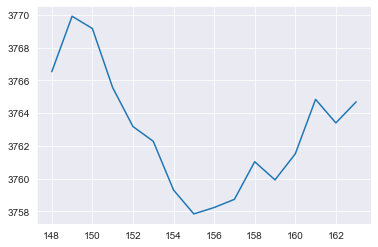

In [201]:
b = a.reset_index().loc[148:163, "Adj Close"]
plt.plot(b)

In [191]:
a = yfinance.download(tickers="^GSPC", start="2022-06-22T12:00:00-04:00", end="2022-06-23", interval="1m")
a

Exception in thread Thread-2027:
Traceback (most recent call last):
  File "/Users/bmartins/.pyenv/versions/3.9.0/lib/python3.9/threading.py", line 950, in _bootstrap_inner
    self.run()
  File "/Users/bmartins/.pyenv/versions/3.9.0/lib/python3.9/threading.py", line 888, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/bmartins/.pyenv/versions/nlp_bert_venv/lib/python3.9/site-packages/yfinance/base.p

KeyboardInterrupt: 